# 뮤직앱 리뷰 분석
#### 참조
- https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/
- https://github.com/wikibook/textmining

### 라이브러리 임포트

In [53]:
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 데이터셋 로드

In [4]:
df = pd.read_csv("geniemusic_review.csv")

In [5]:
df.head()

,content,score,at,source
0,나만 이어폰 가끔씩 한쪽으로 들리나... 개선 좀 해라,1,2022-07-27 08:07:42,google
1,하.. 잘 쓰고 있던 어플이 사라지면서 울며 겨자먹기로 지니뮤직으로 넘어 왔는데 노...,1,2022-07-26 15:17:55,google
2,♧♧♧♧♧,5,2022-07-26 13:17:29,google
3,노래가 가끔 안 넘어가고 렉걸립니다. 개선 좀 하세요 진짜로.,2,2022-07-26 12:34:40,google
4,지니뮤직을 쓰고 있는데 계속해서 오류 문구가 뜹니다. 한번도 아니고 한곡 듣고 나면...,1,2022-07-26 09:42:50,google


In [6]:
df.shape

(29748, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29748 entries, 0 to 29747
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  29724 non-null  object
 1   score    29748 non-null  int64 
 2   at       29748 non-null  object
 3   source   29748 non-null  object
dtypes: int64(1), object(3)
memory usage: 929.8+ KB


### 결측지 삭제

In [8]:
# 결측치
df.isnull().sum()

content    24
score       0
at          0
source      0
dtype: int64

In [9]:
df = df.dropna(axis=0)
df.isnull().sum()

content    0
score      0
at         0
source     0
dtype: int64

### 한글 텍스트 데이터 전처리

In [10]:
# konlpy 설치
# !pip install konlpy==0.5.2 jpype1 Jpype1-py3

In [11]:
# 한글 텍스트 추출 함수 : 띄어 쓰기(1 개)를 포함한 한글만 추출
def hangul(text):
    p = re.compile('[^ ㄱ-ㅣ 가-힣]')  
    result = p.sub('', text)  
    return result

In [12]:
df['content'][8]

'최대 재생곡이 3000개라 아쉬워요. 최대 재생곡은 제한 없이 넣게 하면 타 경쟁 어플들과 차별이 될 것 같습니다.'

In [13]:
# 정규 표현식을 적용하여 특수기호 제거
hangul(df['content'][8])

'최대 재생곡이 개라 아쉬워요 최대 재생곡은 제한 없이 넣게 하면 타 경쟁 어플들과 차별이 될 것 같습니다'

### 한글 형태소 분석 - 명사 단위

In [14]:
from konlpy.tag import Okt
from collections import Counter

- 'convertStrings' 에러 발생시 참조   
- https://gyulogs.tistory.com/130

In [15]:
okt = Okt() 

In [16]:
nouns = okt.nouns(hangul(df['content'][8]))

In [17]:
print(nouns)

['최대', '재생', '곡', '개', '최대', '재생', '곡', '제한', '타', '경쟁', '어플', '차별', '것']


### 전체 말뭉치(corpus)의 명사 형태소 추출

In [18]:
corpus = " ".join(df['content'].tolist())
nouns = okt.nouns(hangul(corpus))

In [19]:
# 빈도 탐색
counter = Counter(nouns)

In [20]:
counter.most_common(50)

[('노래', 8460),
 ('재생', 6411),
 ('지니', 6368),
 ('곡', 4604),
 ('왜', 3860),
 ('음악', 3754),
 ('앱', 3687),
 ('계속', 3322),
 ('로그인', 3274),
 ('업데이트', 3242),
 ('좀', 3183),
 ('때', 2904),
 ('사용', 2889),
 ('어플', 2717),
 ('오류', 2609),
 ('다시', 2440),
 ('거', 2302),
 ('진짜', 2275),
 ('뮤직', 2068),
 ('것', 2057)]

In [21]:
#  한글자 명사 제거
counter = Counter({x: counter[x] for x in counter if len(x) > 1})
print(counter.most_common(50))

[('노래', 8460), ('재생', 6411), ('지니', 6368), ('음악', 3754), ('계속', 3322), ('로그인', 3274), ('업데이트', 3242), ('사용', 2889), ('어플', 2717), ('오류', 2609), ('다시', 2440), ('진짜', 2275), ('뮤직', 2068), ('기능', 1855), ('자꾸', 1808), ('목록', 1805), ('연결', 1792), ('문제', 1755), ('멜론', 1741), ('이용권', 1588), ('다른', 1586), ('다운', 1539), ('네트워크', 1509), ('갑자기', 1473), ('듣기', 1467), ('결제', 1383), ('화면', 1364), ('데이터', 1302), ('정말', 1215), ('삭제', 1207), ('개선', 1197), ('플레이', 1157), ('검색', 1146), ('추가', 1121), ('무료', 1107), ('이용', 1107), ('리스트', 1069), ('가사', 1049), ('해결', 999), ('실행', 995), ('다음', 959), ('그냥', 941), ('가입', 923), ('서버', 923), ('설정', 912), ('지금', 911), ('로그아웃', 857), ('스트리밍', 786), ('이번', 767), ('제발', 766)]


### 불용어 제거

- 한국어 불용어 사전 활용 : https://www.ranks.nl/stopwords/korean

In [22]:
# stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords = pd.read_csv("korean_stopwords.txt").values.tolist()
print(stopwords[:20])

[['휴'], ['아이구'], ['아이쿠'], ['아이고'], ['어'], ['나'], ['우리'], ['저희'], ['따라'], ['의해'], ['을'], ['를'], ['에'], ['의'], ['가'], ['으로'], ['로'], ['에게'], ['뿐이다'], ['의거하여']]


-  불용어 사전에 추가

In [23]:
# music_app_stopwords = ['가나', '다라', '마바']
# for word in music_app_stopwords:
#     stopwords.append(word)

### Word Count

#### BoW(Bag of Word) 벡터 생성

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    p = re.compile('[^ ㄱ-ㅣ 가-힣]')
    result = p.sub('', text)
    okt = Okt()
    nouns = okt.nouns(result) 
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 명사 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['content'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [25]:
# 단어 리스트
print(word_list)

['가가', '가게', '가격', '가곡', '가관', '가기', '가까이', '가끔', '가나', '가나다', '가나다순', '가난', '가내', '가늠', '가능', '가능성', '가다가', '가담', '가도', '가독성', '가동', '가두', '가드', '가득', '가든', '가뜩이나', '가라', '가량', '가렵니', '가로', '가로막', '가로세로', '가림', '가망', '가면', '가모', '가무', '가문', '가바', '가방', '가버렷', '가보', '가분', '가사', '가사도', '가사부뷴', '가산', '가상', '가성', '가세', '가소', '가속', '가수', '가수만', '가스', '가슴', '가시', '가식', '가신', '가십', '가안', '가야', '가업', '가염', '가오', '가왜', '가요', '가요제', '가용', '가용성', '가운', '가운데', '가원', '가유', '가을', '가이거', '가이드', '가이드라인', '가이렉트', '가인', '가입', '가입자', '가장', '가전체', '가점', '가정', '가젤', '가족', '가죽', '가중', '가즈', '가지', '가지가지', '가지연', '가짐', '가짜', '가차', '가추', '가치', '가친', '가타', '가티', '가폰', '가해', '가형', '가호', '가혹', '가회', '각각', '각격', '각도', '각성', '각오', '각의', '각자', '각종', '각하', '간간이', '간격', '간곡', '간다', '간만', '간문제', '간사', '간섭', '간소화', '간엔', '간웅', '간의', '간이', '간잡', '간전', '간정', '간주', '간지', '간직', '간청', '간판', '간편', '간혈', '간혹', '갈건', '갈래', '갈수', '갈수록', '갈이', '감각', '감격', '감기', '감당', '감독', '감동', '감명', '감사', '감사용', '감삼', '감상', '감상량', '감샤', '감성', 

In [26]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
print(count_list)

[  9  19 197 ...   4   1  66]


In [27]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
bow_vect.shape

(29724, 10139)

In [29]:
# "단어" - "총 등장 횟수" Matching
word_count_dict = dict(zip(word_list, count_list))
print(word_count_dict)

{'가가': 9, '가게': 19, '가격': 197, '가곡': 3, '가관': 6, '가기': 56, '가까이': 39, '가끔': 342, '가나': 33, '가나다': 9, '가나다순': 9, '가난': 1, '가내': 4, '가늠': 1, '가능': 54, '가능성': 1, '가다가': 8, '가담': 2, '가도': 11, '가독성': 12, '가동': 1, '가두': 1, '가드': 2, '가득': 3, '가든': 1, '가뜩이나': 6, '가라': 8, '가량': 20, '가렵니': 3, '가로': 149, '가로막': 1, '가로세로': 1, '가림': 2, '가망': 1, '가면': 50, '가모': 1, '가무': 1, '가문': 6, '가바': 3, '가방': 1, '가버렷': 1, '가보': 17, '가분': 4, '가사': 1049, '가사도': 72, '가사부뷴': 1, '가산': 2, '가상': 1, '가성': 8, '가세': 6, '가소': 1, '가속': 1, '가수': 235, '가수만': 3, '가스': 3, '가슴': 3, '가시': 13, '가식': 1, '가신': 1, '가십': 2, '가안': 54, '가야': 29, '가업': 1, '가염': 1, '가오': 2, '가왜': 14, '가요': 709, '가요제': 2, '가용': 3, '가용성': 1, '가운': 3, '가운데': 9, '가원': 13, '가유': 2, '가을': 1, '가이거': 2, '가이드': 4, '가이드라인': 1, '가이렉트': 1, '가인': 1, '가입': 923, '가입자': 18, '가장': 167, '가전체': 1, '가점': 2, '가정': 2, '가젤': 2, '가족': 27, '가죽': 1, '가중': 2, '가즈': 1, '가지': 179, '가지가지': 5, '가지연': 2, '가짐': 12, '가짜': 2, '가차': 1, '가추': 1, '가치': 13, '가친': 1, '가타': 7, '가티': 1, '가폰': 2, 

### TF-IDF 적용
- TF-IDF 변환
- Bag of Words 벡터에 대해서 TF-IDF변환 진행합니다.



In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [31]:
print(tf_idf_vect.shape)

(29724, 10139)


변환 후 28424*9689 matrix가 출력됩니다.   
여기서 한 행(row)은 한 리뷰를 의미하고 한 열(column)은 한 단어를 의미합니다.

In [32]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 9616)	0.7159811393060268
  (0, 7018)	0.4573910947940327
  (0, 269)	0.3270564999982798
  (0, 7)	0.4137613326182563


In [33]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 10139)
[[0. 0. 0. ... 0. 0. 0.]]


 “벡터” - “단어” mapping

In [34]:
vect.vocabulary_

{'이어폰': 7018,
 '가끔': 7,
 '한쪽': 9616,
 '개선': 269,
 '어플': 5815,
 '겨자': 529,
 '먹기': 2989,
 '지니': 8170,
 '뮤직': 3344,
 '노래': 1566,
 '오류': 6212,
 '진짜': 8273,
 '음악': 6822,
 '계속': 595,
 '문구': 3262,
 '한번': 9598,
 '혹시': 9888,
 '삭제': 4345,
 '다시': 1779,
 '마찬가지': 2827,
 '이건': 6909,
 '대체': 1990,
 '뭔가': 3315,
 '제일': 7827,
 '장바구니': 7471,
 '목록': 3138,
 '이전': 7054,
 '업뎃': 5870,
 '플레이': 9443,
 '리스트': 2739,
 '편집': 9310,
 '역순': 6091,
 '최근': 8595,
 '추가': 8623,
 '아래': 5309,
 '하나': 9501,
 '선택': 4569,
 '무슨': 3217,
 '무료': 3198,
 '재생': 7526,
 '최대': 8596,
 '제한': 7842,
 '경쟁': 574,
 '차별': 8390,
 '수고': 4753,
 '요즘': 6478,
 '자주': 7379,
 '화면': 9919,
 '현상': 9834,
 '발생': 3539,
 '탄소': 8938,
 '배출': 3610,
 '재생에너지': 7527,
 '부탁': 3989,
 '배속': 3598,
 '벌써': 3744,
 '다른': 1760,
 '구독': 871,
 '자동': 7329,
 '검색': 460,
 '뚝뚝': 2468,
 '발전': 3548,
 '미리': 3375,
 '듣기': 2309,
 '짜증': 8309,
 '제작자': 7833,
 '다음': 1797,
 '안눌림': 5442,
 '뭐임': 3308,
 '학원': 9576,
 '숙제': 4818,
 '링크': 2768,
 '타고': 8915,
 '번은': 3732,
 '참고': 8431,
 '자꾸': 7320,
 '리뷰': 27

In [35]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{7018: '이어폰', 7: '가끔', 9616: '한쪽', 269: '개선', 5815: '어플', 529: '겨자', 2989: '먹기', 8170: '지니', 3344: '...


###  감성 분류 – Logistic Regression
- 전처리된 리뷰 데이터를 활용하여 감성 분류 예측 모델을 만들겠습니다.
- 감성 분류 예측 모델이란, 이용자 리뷰의 평가 내용을 통해 이 리뷰가 긍정적인지,
   부정적인지를 예측하여, 이용자의 감성을 파악하는 겁니다.
- 따라서, 모델의 X 값(즉, feature 값)은 이용자 리뷰의 평가 내용이 되겠고, 
   모델의 Y 값(즉, label 값)은 이용자의 긍/부정 감성이 되겠습니다.

<AxesSubplot:>

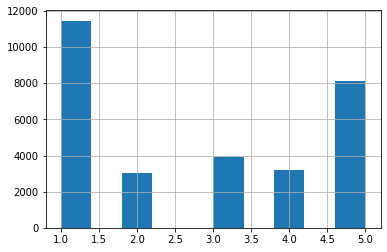

In [36]:
df['score'].hist()

In [37]:
def rating_to_label(rating):
    if rating > 4:
        return 1
    else:
        return 0
    
df['y'] = df['score'].apply(lambda x: rating_to_label(x))

In [38]:
df["y"].value_counts()

0    21614
1     8110
Name: y, dtype: int64

모델의 Feature 변수는 리뷰에서 추출된 형태소와 그들의 중요도를 나타나는 tf_idf_vect로 대체

In [39]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [40]:
x_train.shape, y_train.shape

((20806, 10139), (20806,))

In [41]:
x_test.shape, y_test.shape

((8918, 10139), (8918,))

### 모델 학습

####  Logistic Regression 모델 학습

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [43]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.82
precision: 0.69
recall: 0.62
F1: 0.65


####  Logistic Regression 모델 저장

In [55]:
# model save
file_name = 'review_model.sav'
pickle.dump(lr, open(file_name, 'wb'))

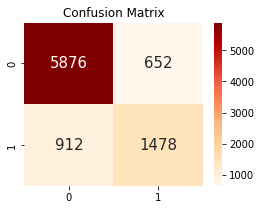

In [44]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

### 긍정 / 부정 키워드 분석

In [45]:
lr.coef_

array([[ 0.72287564, -0.21606157,  0.3930333 , ..., -0.35393173,
        -0.02139921, -1.42743643]])

[]

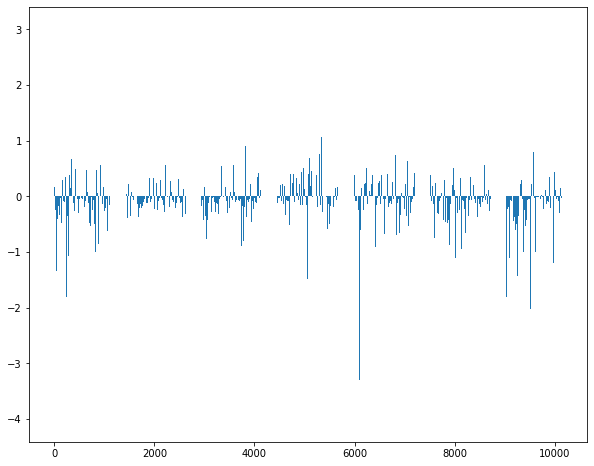

In [46]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
plt.plot()

- 여기서 계수가 양인 경우는 단어가 긍정적인 영향을 미쳤다고 볼 수 있고,   
-  반면에, 음인 경우는 부정적인 영향을 미쳤다고 볼 수 있습니다.  
-  이 계수들을 크기순으로 정렬하면, 긍정 / 부정 키워드를 출력하는 지표가 되겠습니다.
- 먼저 "긍정 키워드"와 "부정 키워드"의 Top 5를 각각 출력(단어의 coeficient와 index)

In [47]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[-5:])

[(3.0503217278640413, 8590), (2.737541181731643, 5591), (2.149451627614743, 1764), (2.141494441646136, 7722), (2.075977802763459, 1950)]
[(-3.289503607448976, 6099), (-3.3960775553803573, 6212), (-3.4792323484797514, 595), (-3.903124899246245, 7320), (-4.052604105421103, 8609)]


- 전체 단어가 포함한 "긍정 키워드 리스트"와 "부정 키워드 리스트"를 정의하고 출력


In [48]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)
coef_pos_index

[(3.0503217278640413, 8590),
 (2.737541181731643, 5591),
 (2.149451627614743, 1764),
 (2.141494441646136, 7722),
 (2.075977802763459, 1950),
 (2.0355224268297136, 9930),
 (2.0174408556369614, 8326),
 (2.001607140585997, 944),
 (1.940302790797171, 210),
 (1.8834889877351333, 8170),
 (1.8078065942272856, 5375),
 (1.753265539617737, 5371),
 (1.7232941646085727, 9672),
 (1.6873063136976778, 6332),
 (1.6313269145322604, 4267),
 (1.4180635953410266, 2883),
 (1.4170831123526682, 945),
 (1.3973835196259434, 2371),
 (1.3716770843831105, 153),
 (1.3635864988405995, 6329),
 (1.3496329330854793, 8646),
 (1.3314936894489549, 6847),
 (1.3082585743859143, 6054),
 (1.2908997077324256, 6872),
 (1.2796235460867715, 6528),
 (1.2338478409721363, 2035),
 (1.2247497616855825, 6963),
 (1.2184436053323484, 5985),
 (1.2158130187935023, 9573),
 (1.2048646299981467, 7286),
 (1.1855569185294352, 2807),
 (1.1794776896928423, 7766),
 (1.1746556841122313, 979),
 (1.1442011871044888, 5332),
 (1.1354199841567632, 151)

- index를 단어로 변환하여 "긍정 키워드 리스트"와 "부정 키워드 리스트"의 Top 20 단어를 출력

In [49]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{7018: '이어폰',
 7: '가끔',
 9616: '한쪽',
 269: '개선',
 5815: '어플',
 529: '겨자',
 2989: '먹기',
 8170: '지니',
 3344: '뮤직',
 1566: '노래',
 6212: '오류',
 8273: '진짜',
 6822: '음악',
 595: '계속',
 3262: '문구',
 9598: '한번',
 9888: '혹시',
 4345: '삭제',
 1779: '다시',
 2827: '마찬가지',
 6909: '이건',
 1990: '대체',
 3315: '뭔가',
 7827: '제일',
 7471: '장바구니',
 3138: '목록',
 7054: '이전',
 5870: '업뎃',
 9443: '플레이',
 2739: '리스트',
 9310: '편집',
 6091: '역순',
 8595: '최근',
 8623: '추가',
 5309: '아래',
 9501: '하나',
 4569: '선택',
 3217: '무슨',
 3198: '무료',
 7526: '재생',
 8596: '최대',
 7842: '제한',
 574: '경쟁',
 8390: '차별',
 4753: '수고',
 6478: '요즘',
 7379: '자주',
 9919: '화면',
 9834: '현상',
 3539: '발생',
 8938: '탄소',
 3610: '배출',
 7527: '재생에너지',
 3989: '부탁',
 3598: '배속',
 3744: '벌써',
 1760: '다른',
 871: '구독',
 7329: '자동',
 460: '검색',
 2468: '뚝뚝',
 3548: '발전',
 3375: '미리',
 2309: '듣기',
 8309: '짜증',
 7833: '제작자',
 1797: '다음',
 5442: '안눌림',
 3308: '뭐임',
 9576: '학원',
 4818: '숙제',
 2768: '링크',
 8915: '타고',
 3732: '번은',
 8431: '참고',
 7320: '자꾸',
 2733: '리

In [50]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

최고 3.0503217278640413
애플 2.737541181731643
다만 2.149451627614743
정말 2.141494441646136
대박 2.075977802763459
화이팅 2.0355224268297136
짱짱 2.0174408556369614
굿굿 2.001607140585997
강추 1.940302790797171
지니 1.8834889877351333
아주 1.8078065942272856
아이폰 1.753265539617737
항상 1.7232941646085727
완전 1.6873063136976778
사랑 1.6313269145322604
만족 1.4180635953410266
굿굿굿 1.4170831123526682
디자인 1.3973835196259434
감사 1.3716770843831105
완벽 1.3635864988405995


In [51]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

최악 -4.052604105421103
자꾸 -3.903124899246245
계속 -3.4792323484797514
오류 -3.3960775553803573
연결 -3.289503607448976
갑자기 -3.129054577985429
네트워크 -3.021251598923709
로그인 -2.96961001947617
쓰레기 -2.9633709571468936
재생 -2.8225071133128106
실행 -2.686893376717677
무슨 -2.551941333799332
서버 -2.535726180750168
개선 -2.463030855263321
탈퇴 -2.451937122026906
아예 -2.3411505219930393
해지 -2.3229180002744934
사기 -2.2585833460886526
해도 -2.253675360888794
접속 -2.252689287486497


### 분석결과 

키워드를 살펴보면:  
지니뮤직앱 사용자들은 음질과 디자인 등에 만족하는 것으로 보입니다.  
하지만 네트워크 연결, 접속, 서버 등에 개선이 필요해보입니다.